In [156]:
from typing import Optional, Callable, Tuple, List, NoReturn
from functools import partial, reduce

from scipy import ndimage
import scipy

import skimage as ski
from skimage import io
from skimage import filters

import matplotlib.pyplot as plt
import matplotlib.image as img

import seaborn as sns

import numpy as np
import cv2 as cv
import PIL as pil

# Image processing : 
import cv2 as cv
from scipy import ndimage as ndi
import skimage
from skimage import data
import skimage.segmentation as seg
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.morphology import disk, skeletonize, thin, medial_axis, watershed, max_tree, convex_hull_image, closing
import cv2 as cv
import skimage
from skimage.feature import canny, peak_local_max
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte, img_as_float
from skimage import exposure
import skimage.morphology as morphology
from skimage.morphology import disk, skeletonize, thin, medial_axis, watershed, max_tree, convex_hull_image, closing
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
import skimage.measure as measure
import skimage.draw as draw
from skimage.color import label2rgb
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image
#from skimage.morphology import disk

from skimage.filters import rank
from skimage.measure import label, regionprops

In [138]:
plt.rcParams["figure.figsize"] = (10, 10)

In [139]:
# User-defined functions, utils module found in the same directory as Erosion.ipynb
from utils import binarise, side_by_side

In [140]:
def gaussian_sharpen(f: np.ndarray, alpha: int = 30) -> np.ndarray:
    """
        taken from https://scipy-lectures.org/advanced/image_processing/auto_examples/plot_sharpen.html
    """
    blurred_f = ndimage.gaussian_filter(f, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
    
    return sharpened

In [141]:
#help(ndimage.gaussian_filter)
#help(io.imread)

In [142]:
x = (255*img.imread('images/edited_p10.png')).astype(int)
x.shape

(437, 320, 4)

In [172]:
x = (255*io.imread("images/edited_p10.png", as_gray=True)).astype(int)
xi = 255.0 - x
xi /= 255.0
x = 1.0 - xi 

In [190]:
thresh = filters.threshold_isodata(xi)
mask = xi > thresh

Img          254.99999999999997 0.0
Original Lap 1220.0935632040892 -1574.5477627260993
Scaled Lap   100.0 -129.05139492672822
SharpImg     355.0 -129.05139492672822
SharpImg abs 355.0 0.023129879912943352
SharpImg after scaling 255.00000000000003 0.016614420782536776


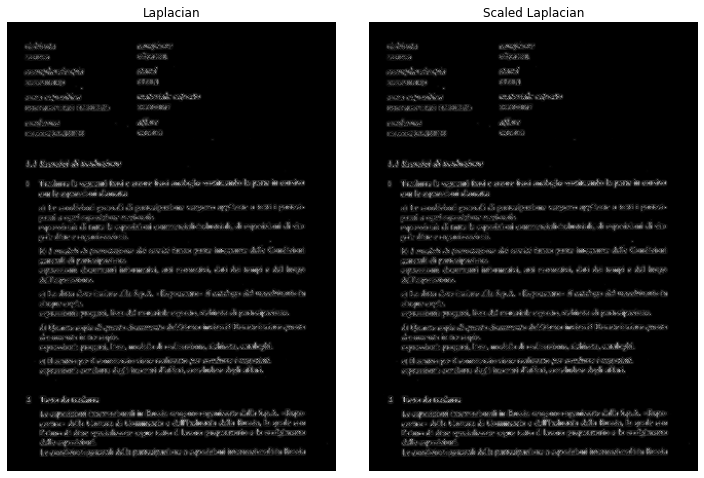

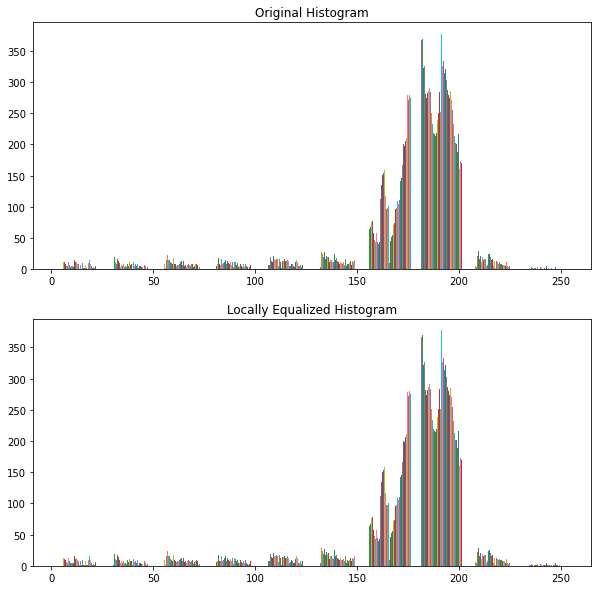

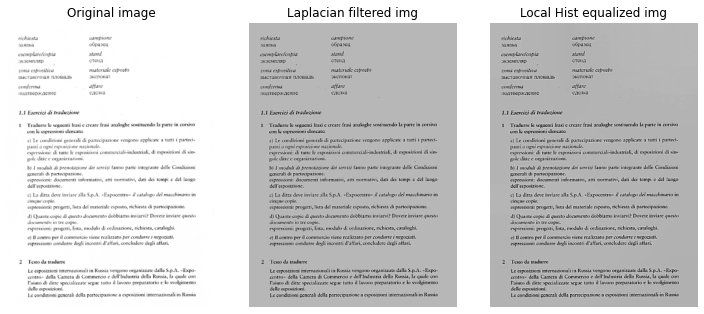

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.misc
import scipy.io
import scipy.ndimage.filters
import cv2

#Function for plotting abs:
pic_n       = 1
def show_abs(I, plot_title):
    plt.title(plot_title)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(abs(I), cm.gray)

#Reading of the image into numpy array:
A0           = io.imread("images/edited_p10.png", as_gray=True)
A0          -= np.amin(A0)#map values to the (0, 255) range
A0          *= 255.0/np.amax(A0)
print('Img         ', np.amax(A0), np.amin(A0))
#>>> Img          255.0 0.0

#Kernel for negative Laplacian
kernel      = np.ones((3,3))*(-1)
kernel[1,1] = 8

#Convolution of the image with the kernel:
Lap        = scipy.ndimage.filters.convolve(A0, kernel)

#Laplacian now has negative values
print('Original Lap', np.amax(Lap), np.amin(Lap))
#>>> Original Lap 1151.0 -1166.0

#Map Laplacian to some new range:
Laps        = Lap*100.0/np.amax(Lap) #Sharpening factor!
print('Scaled Lap  ', np.amax(Laps), np.amin(Laps))
#>>> Scaled Lap   100.0 -101.303

plt.figure(pic_n)
pic_n += 1
plt.subplot(1,2,1)
show_abs(Lap, 'Laplacian')
plt.subplot(1,2,2)
show_abs(Laps, 'Scaled Laplacian')

A           = A0 + Laps #Add negative Laplacian to the original image

print('SharpImg    ', np.amax(A), np.amin(A))
#>>> SharpImg     350.917 -81.06

A = abs(A) #Get rid of negative values
print('SharpImg abs', np.amax(A), np.amin(A))

A           *= 255.0/np.amax(A)
print('SharpImg after scaling', np.amax(A), np.amin(A))
#>>> SharpImg abs 350.917 0.0

# Local Histogram Equalization with OpenCV:
A_cv2       = A
A_cv2       = A_cv2.astype(np.uint8)

tile_s0     = 4
tile_s1     = 4

clahe       = cv2.createCLAHE(clipLimit=1, tileGridSize=(tile_s0,tile_s1))
A_cv2       = clahe.apply(A_cv2)

plt.figure(pic_n)
pic_n += 1
plt.subplot(2,1,1)
plt.hist(A_cv2)
plt.title('Original Histogram')
plt.subplot(2,1,2)
plt.hist(A_cv2)
plt.title('Locally Equalized Histogram')

plt.figure(pic_n)
pic_n += 1
plt.subplot(1,3,1)
show_abs(A0, 'Original image')
plt.subplot(1,3,2)
show_abs(A, 'Laplacian filtered img')
plt.subplot(1,3,3)
show_abs(A_cv2, 'Local Hist equalized img')
plt.show()

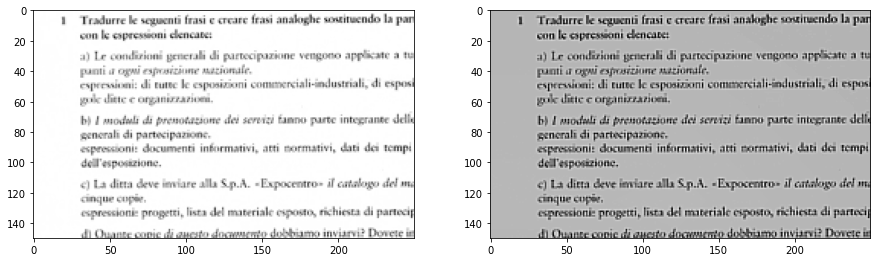

In [216]:
side_by_side(A0[150:300, 0:250], A_cv2[150:300, 0:250])

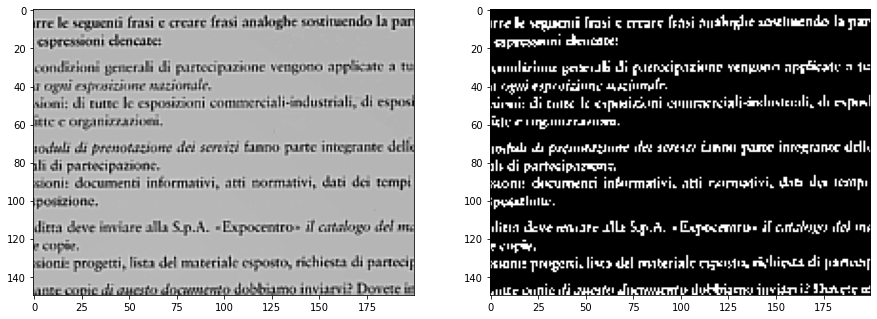

In [215]:
thres = filters.threshold_otsu(A_cv2)
Amask = A_cv2 < thres
side_by_side(A_cv2[150:300, 50:250], Amask[150:300, 50:250])

In [ ]:
kernel = np.ones((1, 1))
side_by_side(text2, cv.dilate(text2, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

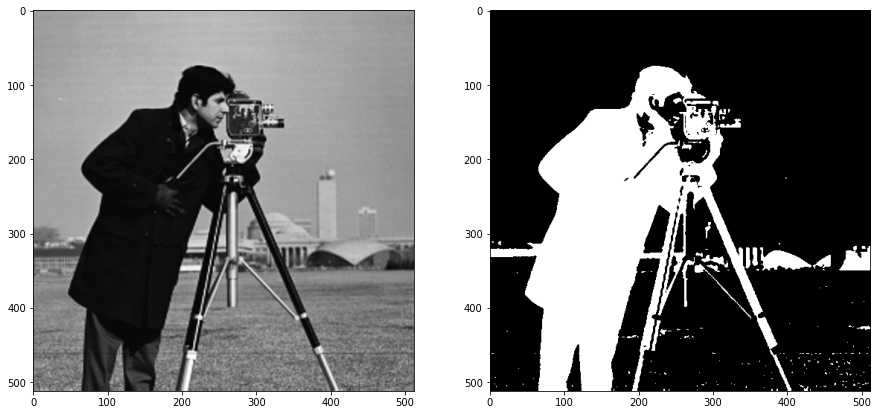

In [208]:
from skimage import data
from skimage import filters
camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val
side_by_side(camera, mask)

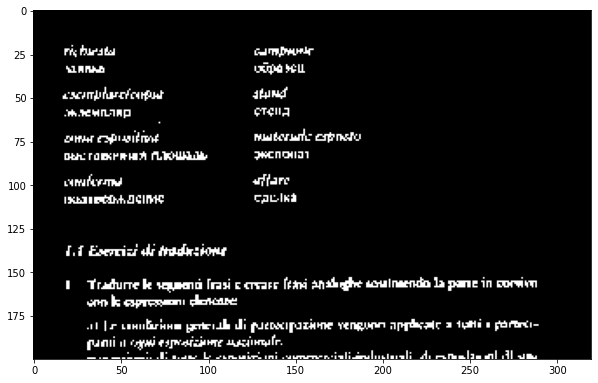

In [189]:
plt.imshow(mask[0:200, 0:500], cmap='gray')

In [154]:
xi_sk = skeletonize(xi)
#reduce(lambda x, y: int(x) + int(y), xi_sk.flatten())

In [155]:
#plt.imshow(xi_sk[0:200, 0:500], cmap='gray')

In [130]:
#y = gaussian_sharpen(xi, alpha=3000)
#plt.imshow(y[0:200, 0:500], cmap='gray')

In [112]:
#help(binarise)

In [113]:
#sns.distplot((1-binaria).flatten())

In [132]:
#binaria = binarise(xi)
#cbinaria = 255 - binaria
#plt.imshow(binaria[0:200, 0:500], cmap='gray')

In [135]:
ski.filters

AttributeError: module 'skimage' has no attribute 'filters'

In [118]:
#help(cv.dilate)

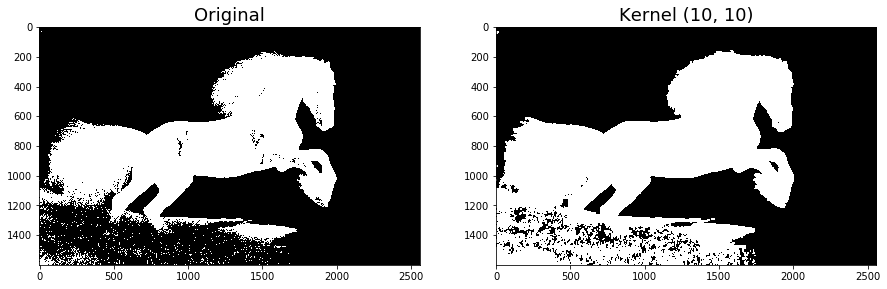

In [9]:
kernel = np.ones((10, 10))
side_by_side(binaria, cv.dilate(binaria, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

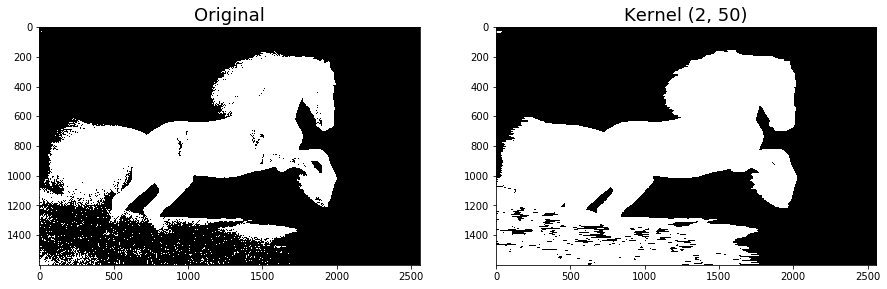

In [10]:
kernel = np.ones((2, 50))
side_by_side(binaria, cv.dilate(binaria, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

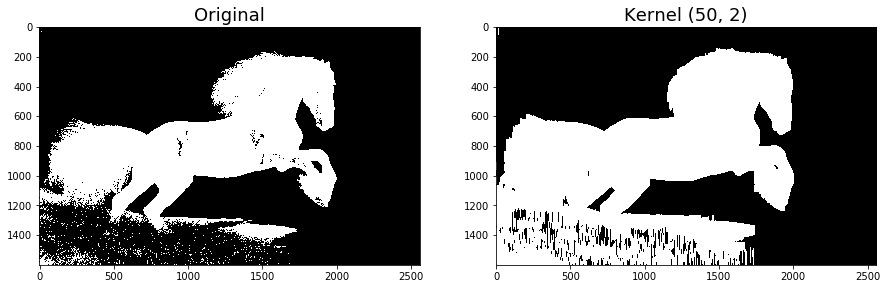

In [11]:
kernel = np.ones((50, 2))
side_by_side(binaria, cv.dilate(binaria, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

# Example found on page 643

In [12]:
text = cv.imread('imagenes/text.png', 0)
text.shape

(525, 794)

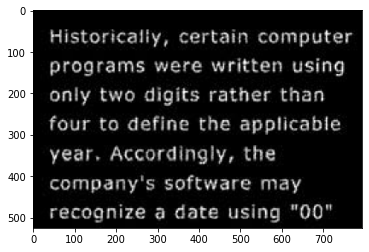

In [13]:
plt.imshow(text, cmap='gray')

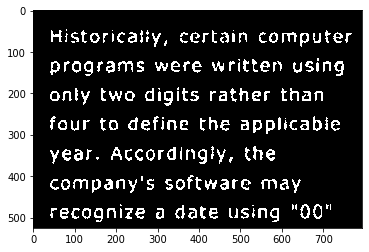

In [14]:
text2 = binarise(text, threshold=115)
plt.imshow(text2, cmap='gray')

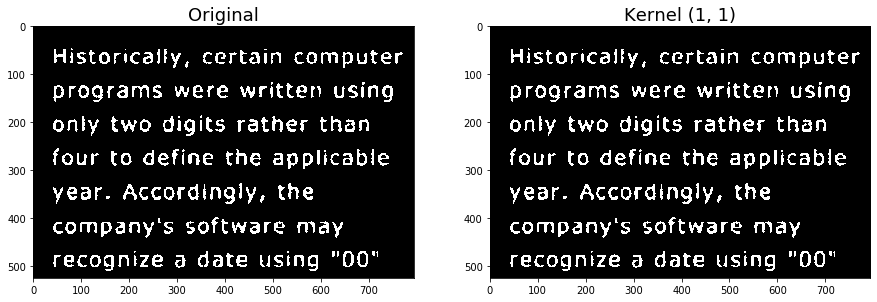

In [15]:
kernel = np.ones((1, 1))
side_by_side(text2, cv.dilate(text2, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

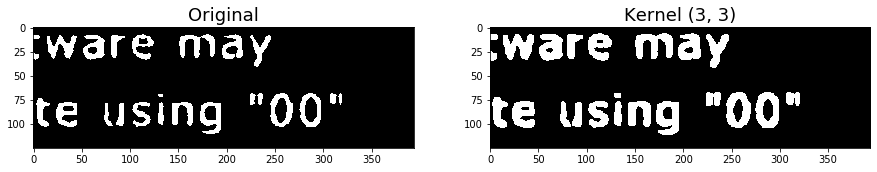

In [16]:
kernel = np.ones((3, 3))
side_by_side(text2[400:, 400:], cv.dilate(text2[400:, 400:], kernel), title1='Original', title2=f'Kernel {kernel.shape}')

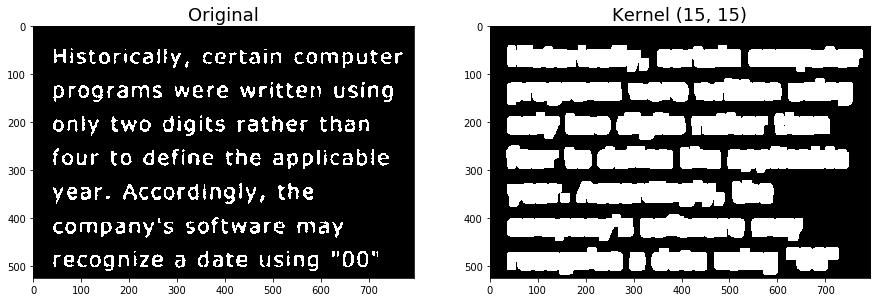

In [17]:
kernel = np.ones((15, 15))
side_by_side(text2, cv.dilate(text2, kernel), title1='Original', title2=f'Kernel {kernel.shape}')

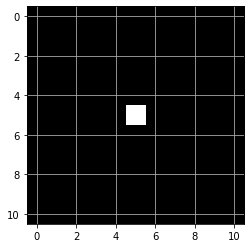

In [43]:
A = np.zeros((11, 11))
A[5, 5] = 1
plt.grid()
plt.imshow(A, cmap='gray')

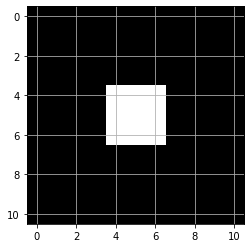

In [42]:
B = [A, np.ones((3, 1)), np.ones((1, 3))]
dilate_decomposed = reduce(lambda x, y: cv.dilate(x, y), B)
plt.grid()
plt.imshow(dilate_decomposed, cmap='gray')

In [49]:
y = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0])
y.shape = 3, 3
y = np.uint8(y)
y

array([[1, 1, 0],
       [0, 1, 1],
       [0, 1, 0]], dtype=uint8)

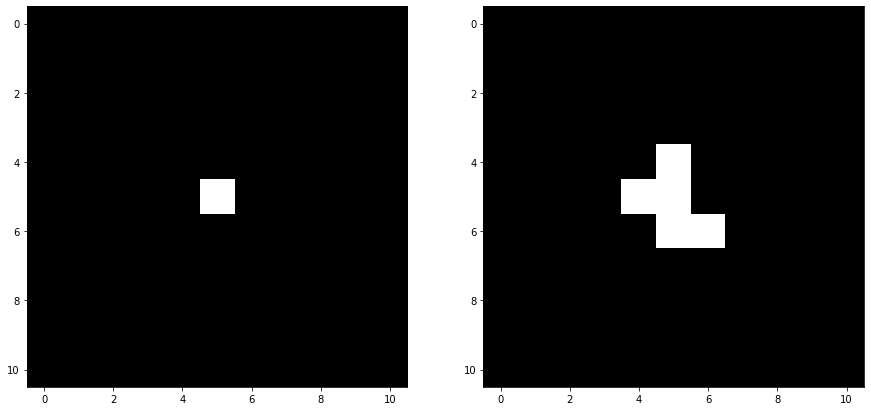

In [52]:
side_by_side(A, cv.dilate(A, y))

In [40]:
np.ones((3, 1))

array([[1.],
       [1.],
       [1.]])

In [ ]:
reverse